In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *
from nbodykit import style, setup_logging
import matplotlib.pyplot as plt
plt.style.use(style.notebook)
import gc
import pandas as pd
import nbodykit as nb

In [2]:
data_read = pd.read_csv('./Ne_Galaxy_Mstar10_ver2.csv')
print(data_read)

                X           Y          Z           Mass  StellarMass  \
0       43.718810   48.813640  147.59496  189451.730000   783.803400   
1       45.442272   51.850200  146.41650   53636.387000   374.465360   
2       44.490760   49.091713  147.87057    1323.301300    84.685110   
3       43.820786   50.939400  147.71104     730.714970    35.296432   
4       44.302578   49.630974  147.86949     690.085700    32.565090   
...           ...         ...        ...            ...          ...   
97008   10.228784  118.992710  192.99580       7.450773     1.552666   
97009  176.708270  108.186970  186.70604       8.753557     1.273605   
97010   44.697636   47.188305  149.88548       9.418049     1.096117   
97011   43.667706   73.888084  147.98112       5.398947     1.028258   
97012   45.803550   69.286766  145.47922       6.340109     1.122643   

               Vx          Vy          Vz          Nex          Ney  \
0       472.19620   450.85000  -260.74692  4156.156662  4155.531

In [3]:
sub_data = data_read[['HaloMass','Nex']]
print(sub_data)

            HaloMass          Nex
0      286449.700000  4156.156662
1      286449.700000  1115.259432
2      286449.700000  3963.902220
3      286449.700000    12.345561
4      286449.700000  3526.170518
...              ...          ...
97008       8.873478   103.257322
97009      10.944721    80.724896
97010      10.722833    12.335553
97011       6.748273    40.062974
97012       6.541734    13.234448

[97013 rows x 2 columns]


In [4]:
sub_np = np.array(sub_data)
print(sub_np)

[[2.86449700e+05 4.15615666e+03]
 [2.86449700e+05 1.11525943e+03]
 [2.86449700e+05 3.96390222e+03]
 ...
 [1.07228330e+01 1.23355526e+01]
 [6.74827340e+00 4.00629735e+01]
 [6.54173400e+00 1.32344476e+01]]


In [5]:
mass = sub_np[:,0]
tau = sub_np[:,1]
idx = np.argsort(mass)  
mass_sorted = mass[idx]  
tau_sorted  = tau[idx] 

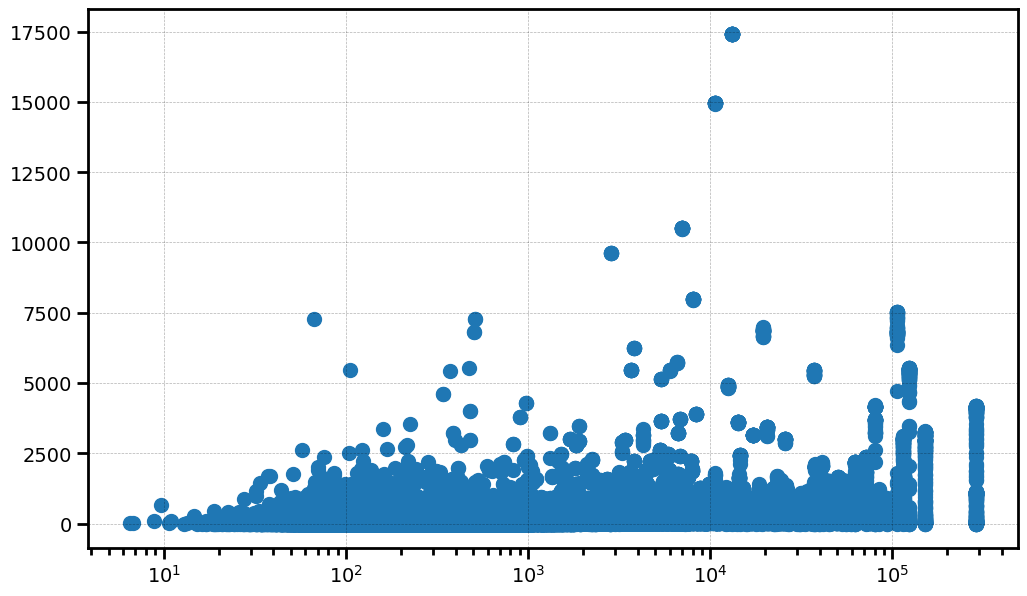

In [6]:
plt.scatter(mass_sorted, tau_sorted)
plt.xscale('log')
# plt.yscale('linear')

In [7]:
exp_edges = np.arange(0.5, 5 + 0.5, 0.5)   
edges     = 10 ** exp_edges 

In [8]:
bin_idx = np.digitize(mass, edges) - 1 

In [9]:
df = pd.DataFrame({'mass': mass, 'tau': tau, 'bin': bin_idx})
df = df[df['bin'].between(0, len(edges)-2)]

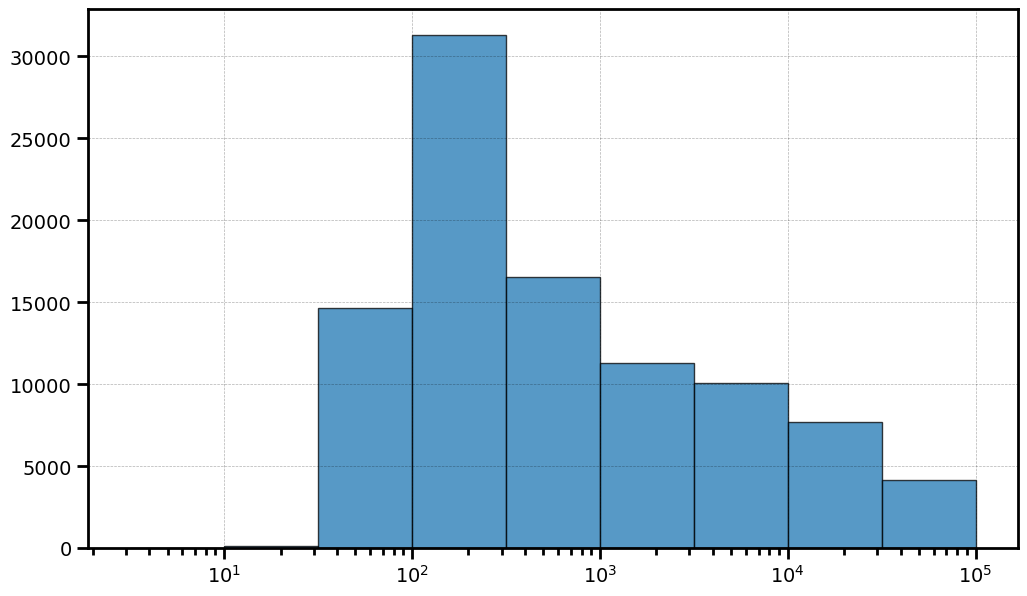

In [10]:
plt.hist(df['mass'], bins=edges, edgecolor='k', alpha=0.75)
plt.xscale('log')

     count        mean      median
bin                               
0        4  200.901330   71.660148
1      152   66.480475   22.706517
2    14615   54.105513   23.852328
3    31307   64.005516   30.131988
4    16533   86.968651   29.443729
5    11310  141.337439   61.343226
6    10100  280.603566  118.132026
7     7673  446.808553  226.847472
8     4152  666.676880  449.397404


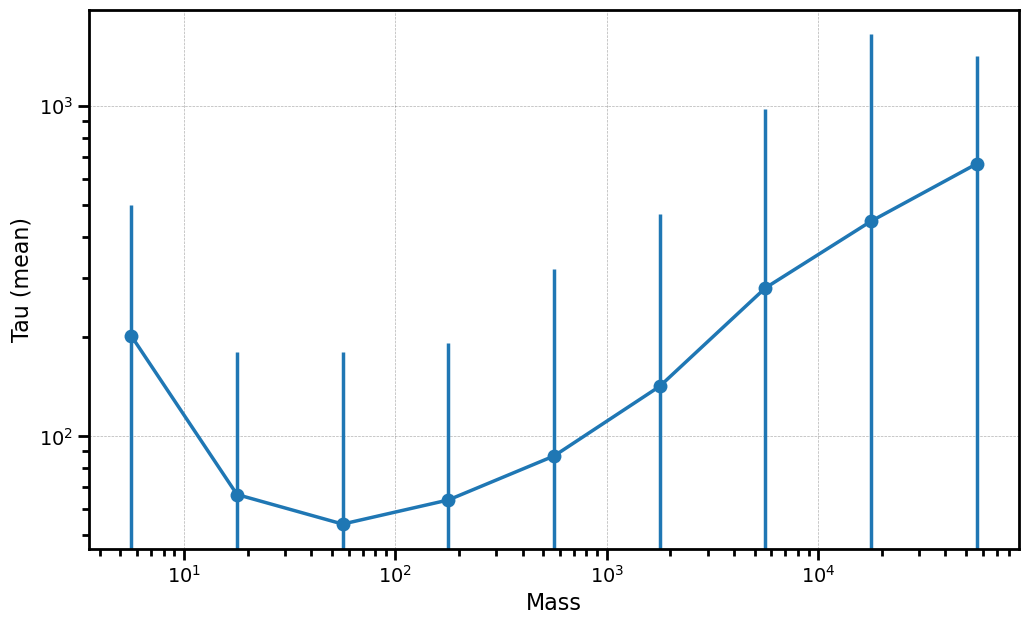

In [11]:
stats = (
    df.groupby('bin')['tau']
      .agg(count='size', mean='mean', median='median')
)
print(stats)


bin_centers = 10 ** (exp_edges[:-1] + 0.25)  
plt.errorbar(bin_centers, stats['mean'], yerr=df.groupby('bin')['tau'].std(),fmt='o-', capsize=3)
# plt.xscale('linear')
plt.xscale('log')
plt.xlabel('Mass')
plt.yscale('log')
plt.ylabel('Tau (mean)')
plt.show()

# bin_centers = 10 ** (exp_edges[:-1] + 0.25)

# stats = (
#     df.groupby('bin')['tau']
#       .agg(count='size', mean='mean', median='median', std='std')
# )

# idx = stats.index.to_numpy()            
# x    = bin_centers[idx]                
# y    = stats['mean'].values
# yerr = stats['std'].values

# plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=3)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel(r'$M_\star\,[M_\odot]$')
# plt.ylabel(r'$\langle \tau \rangle$')
# plt.show()


In [12]:
sub_data_2 = data_read[['HaloMass','Nex','Ney','Nez']]
print(sub_data_2)

            HaloMass          Nex          Ney          Nez
0      286449.700000  4156.156662  4155.531221  4158.564895
1      286449.700000  1115.259432  1116.789488  1115.337921
2      286449.700000  3963.902220  3735.185279  3815.275102
3      286449.700000    12.345561    13.297539    12.393060
4      286449.700000  3526.170518  3725.424242  2218.163603
...              ...          ...          ...          ...
97008       8.873478   103.257322   105.161446   108.738661
97009      10.944721    80.724896   101.673485    78.006037
97010      10.722833    12.335553   110.227249   110.306912
97011       6.748273    40.062974    80.602341    80.599535
97012       6.541734    13.234448     0.087366    12.834573

[97013 rows x 4 columns]


In [13]:
np_2 = np.array(sub_data_2)

In [14]:
mass = np_2[:,0]
tau_x = np_2[:,1]
tau_y = np_2[:,2]
tau_z = np_2[:,3]

In [15]:
tau = np.sqrt(tau_x**2 + tau_y**2 +tau_z**2)

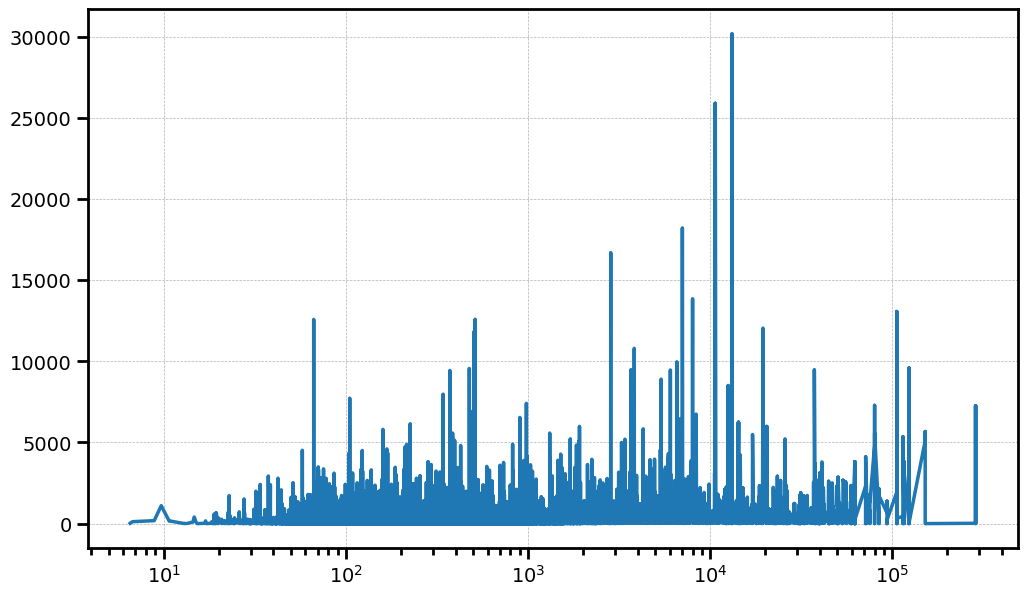

In [16]:
idx = np.argsort(mass)  
mass_sorted = mass[idx]  
tau_sorted  = tau[idx] 
plt.loglog(mass_sorted, tau_sorted)
plt.yscale('linear')

In [17]:
exp_edges = np.arange(0.5, 5 + 0.5, 0.5)   
edges     = 10 ** exp_edges 

     count         mean      median
bin                                
0        4   357.060327  151.987833
1      152   128.444710   46.633679
2    14615    95.466990   42.768903
3    31307   112.489177   53.621997
4    16533   152.949876   52.827972
5    11310   245.403893  108.267572
6    10100   490.027552  205.453003
7     7673   777.221678  397.906396
8     4152  1163.605929  778.964653


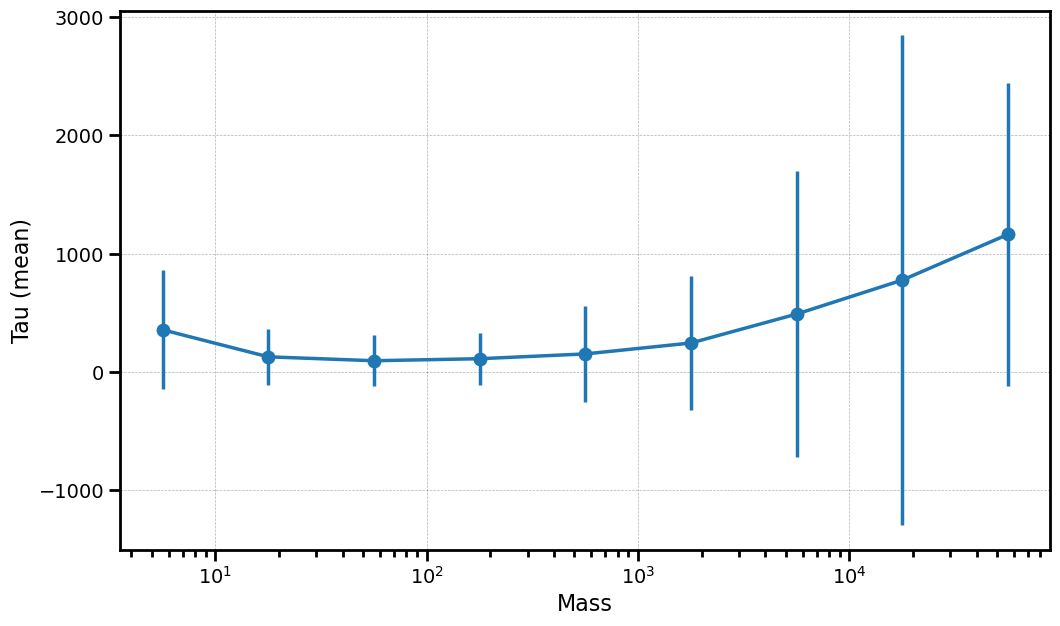

In [19]:
bin_idx = np.digitize(mass, edges) - 1 
df = pd.DataFrame({'mass': mass, 'tau': tau, 'bin': bin_idx})
df = df[df['bin'].between(0, len(edges)-2)]
stats = (
    df.groupby('bin')['tau']
      .agg(count='size', mean='mean', median='median')
)
print(stats)


bin_centers = 10 ** (exp_edges[:-1] + 0.25)  
plt.errorbar(bin_centers, stats['mean'], yerr=df.groupby('bin')['tau'].std(),fmt='o-', capsize=3)
# plt.xscale('linear')
plt.xscale('log')
plt.xlabel('Mass')
plt.yscale('log')
plt.ylabel('Tau (mean)')

plt.yscale('linear')
plt.show()